# Learning Rate Finder Example

This notebook demonstrates how to use the Learning Rate Finder to find optimal learning rates for your models.

In [9]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

# Add project root to path
project_root = Path().cwd().parent
sys.path.insert(0, str(project_root))
from src.lr_finder import run_lr_finder
from src.model import ModelType

In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

## Configuration

In [12]:
# Paths
dataloader_dir = Path("../output/data/dataloader_2014_2015_top_53_store_2000_item/")
output_dir = Path("../output/models/lr_finder/")

# Model configuration
store_cluster = 17
item_cluster = 15
model_type = ModelType.SHALLOW_NN

# LR Finder parameters
start_lr = 1e-7
end_lr = 1.0
num_iter = 100

print(f"Dataloader directory: {dataloader_dir}")
print(f"Output directory: {output_dir}")
print(f"Store cluster: {store_cluster}, Item cluster: {item_cluster}")
print(f"Model type: {model_type.value}")

Dataloader directory: ../output/data/dataloader_2014_2015_top_53_store_2000_item
Output directory: ../output/models/lr_finder
Store cluster: 17, Item cluster: 15
Model type: ShallowNN


## Run Learning Rate Finder

In [13]:
# Run the LR finder
suggested_lr = run_lr_finder(
    dataloader_dir=dataloader_dir,
    store_cluster=store_cluster,
    item_cluster=item_cluster,
    model_type=model_type,
    output_dir=output_dir,
    start_lr=start_lr,
    end_lr=end_lr,
    num_iter=num_iter,
    log_level="INFO"
)

print(f"\nSuggested Learning Rate: {suggested_lr:.2e}")

INFO:src.lr_finder:Running LR Finder for store_cluster=17, item_cluster=15
INFO:src.lr_finder:Model type: ShallowNN
INFO:src.lr_finder:Input dim: 17, Output dim: 1
INFO:src.lr_finder:Starting LR range test from 1e-07 to 1.0
/Users/yvesgreatti/.pyenv/versions/retail/lib/python3.12/site-packages/lightning/pytorch/core/module.py:441: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


Iteration 0/100, LR: 1.00e-07, Loss: 13.4995
Iteration 10/100, LR: 5.09e-07, Loss: 14.2398
Iteration 20/100, LR: 2.60e-06, Loss: 13.3037
Iteration 30/100, LR: 1.32e-05, Loss: 13.0169
Iteration 40/100, LR: 6.73e-05, Loss: 13.1328
Iteration 50/100, LR: 3.43e-04, Loss: 12.8842
Iteration 60/100, LR: 1.75e-03, Loss: 14.5329
Iteration 70/100, LR: 8.90e-03, Loss: 12.8168
Iteration 80/100, LR: 4.53e-02, Loss: 9.1733
Iteration 90/100, LR: 2.31e-01, Loss: 4.9698


INFO:src.lr_finder:Results saved to ../output/models/lr_finder/lr_finder_17_15_ShallowNN.csv
INFO:src.lr_finder:Plot saved to ../output/models/lr_finder/lr_finder_17_15_ShallowNN.png
INFO:src.lr_finder:Suggested learning rate: 1.42e-01


Plot saved to ../output/models/lr_finder/lr_finder_17_15_ShallowNN.png

Suggested Learning Rate: 1.42e-01


## View Results

In [14]:
# Load and display the results
csv_file = output_dir / f"lr_finder_{store_cluster}_{item_cluster}_{model_type.value}.csv"
plot_file = output_dir / f"lr_finder_{store_cluster}_{item_cluster}_{model_type.value}.png"

if csv_file.exists():
    results_df = pd.read_csv(csv_file)
    print(f"Results loaded from {csv_file}")
    print(f"Shape: {results_df.shape}")
    print("\nFirst few rows:")
    print(results_df.head())
    
    print("\nLast few rows:")
    print(results_df.tail())
else:
    print(f"Results file not found: {csv_file}")

Results loaded from ../output/models/lr_finder/lr_finder_17_15_ShallowNN.csv
Shape: (100, 2)

First few rows:
   learning_rate       loss
0   1.000000e-07  13.499502
1   1.176812e-07  14.046264
2   1.384886e-07  14.716665
3   1.629751e-07  14.353620
4   1.917910e-07  13.010532

Last few rows:
    learning_rate       loss
95       0.521401  12.407958
96       0.613591  11.835317
97       0.722081  10.344503
98       0.849753  11.076817
99       1.000000  10.798203


Learning Rate Finder Plot:


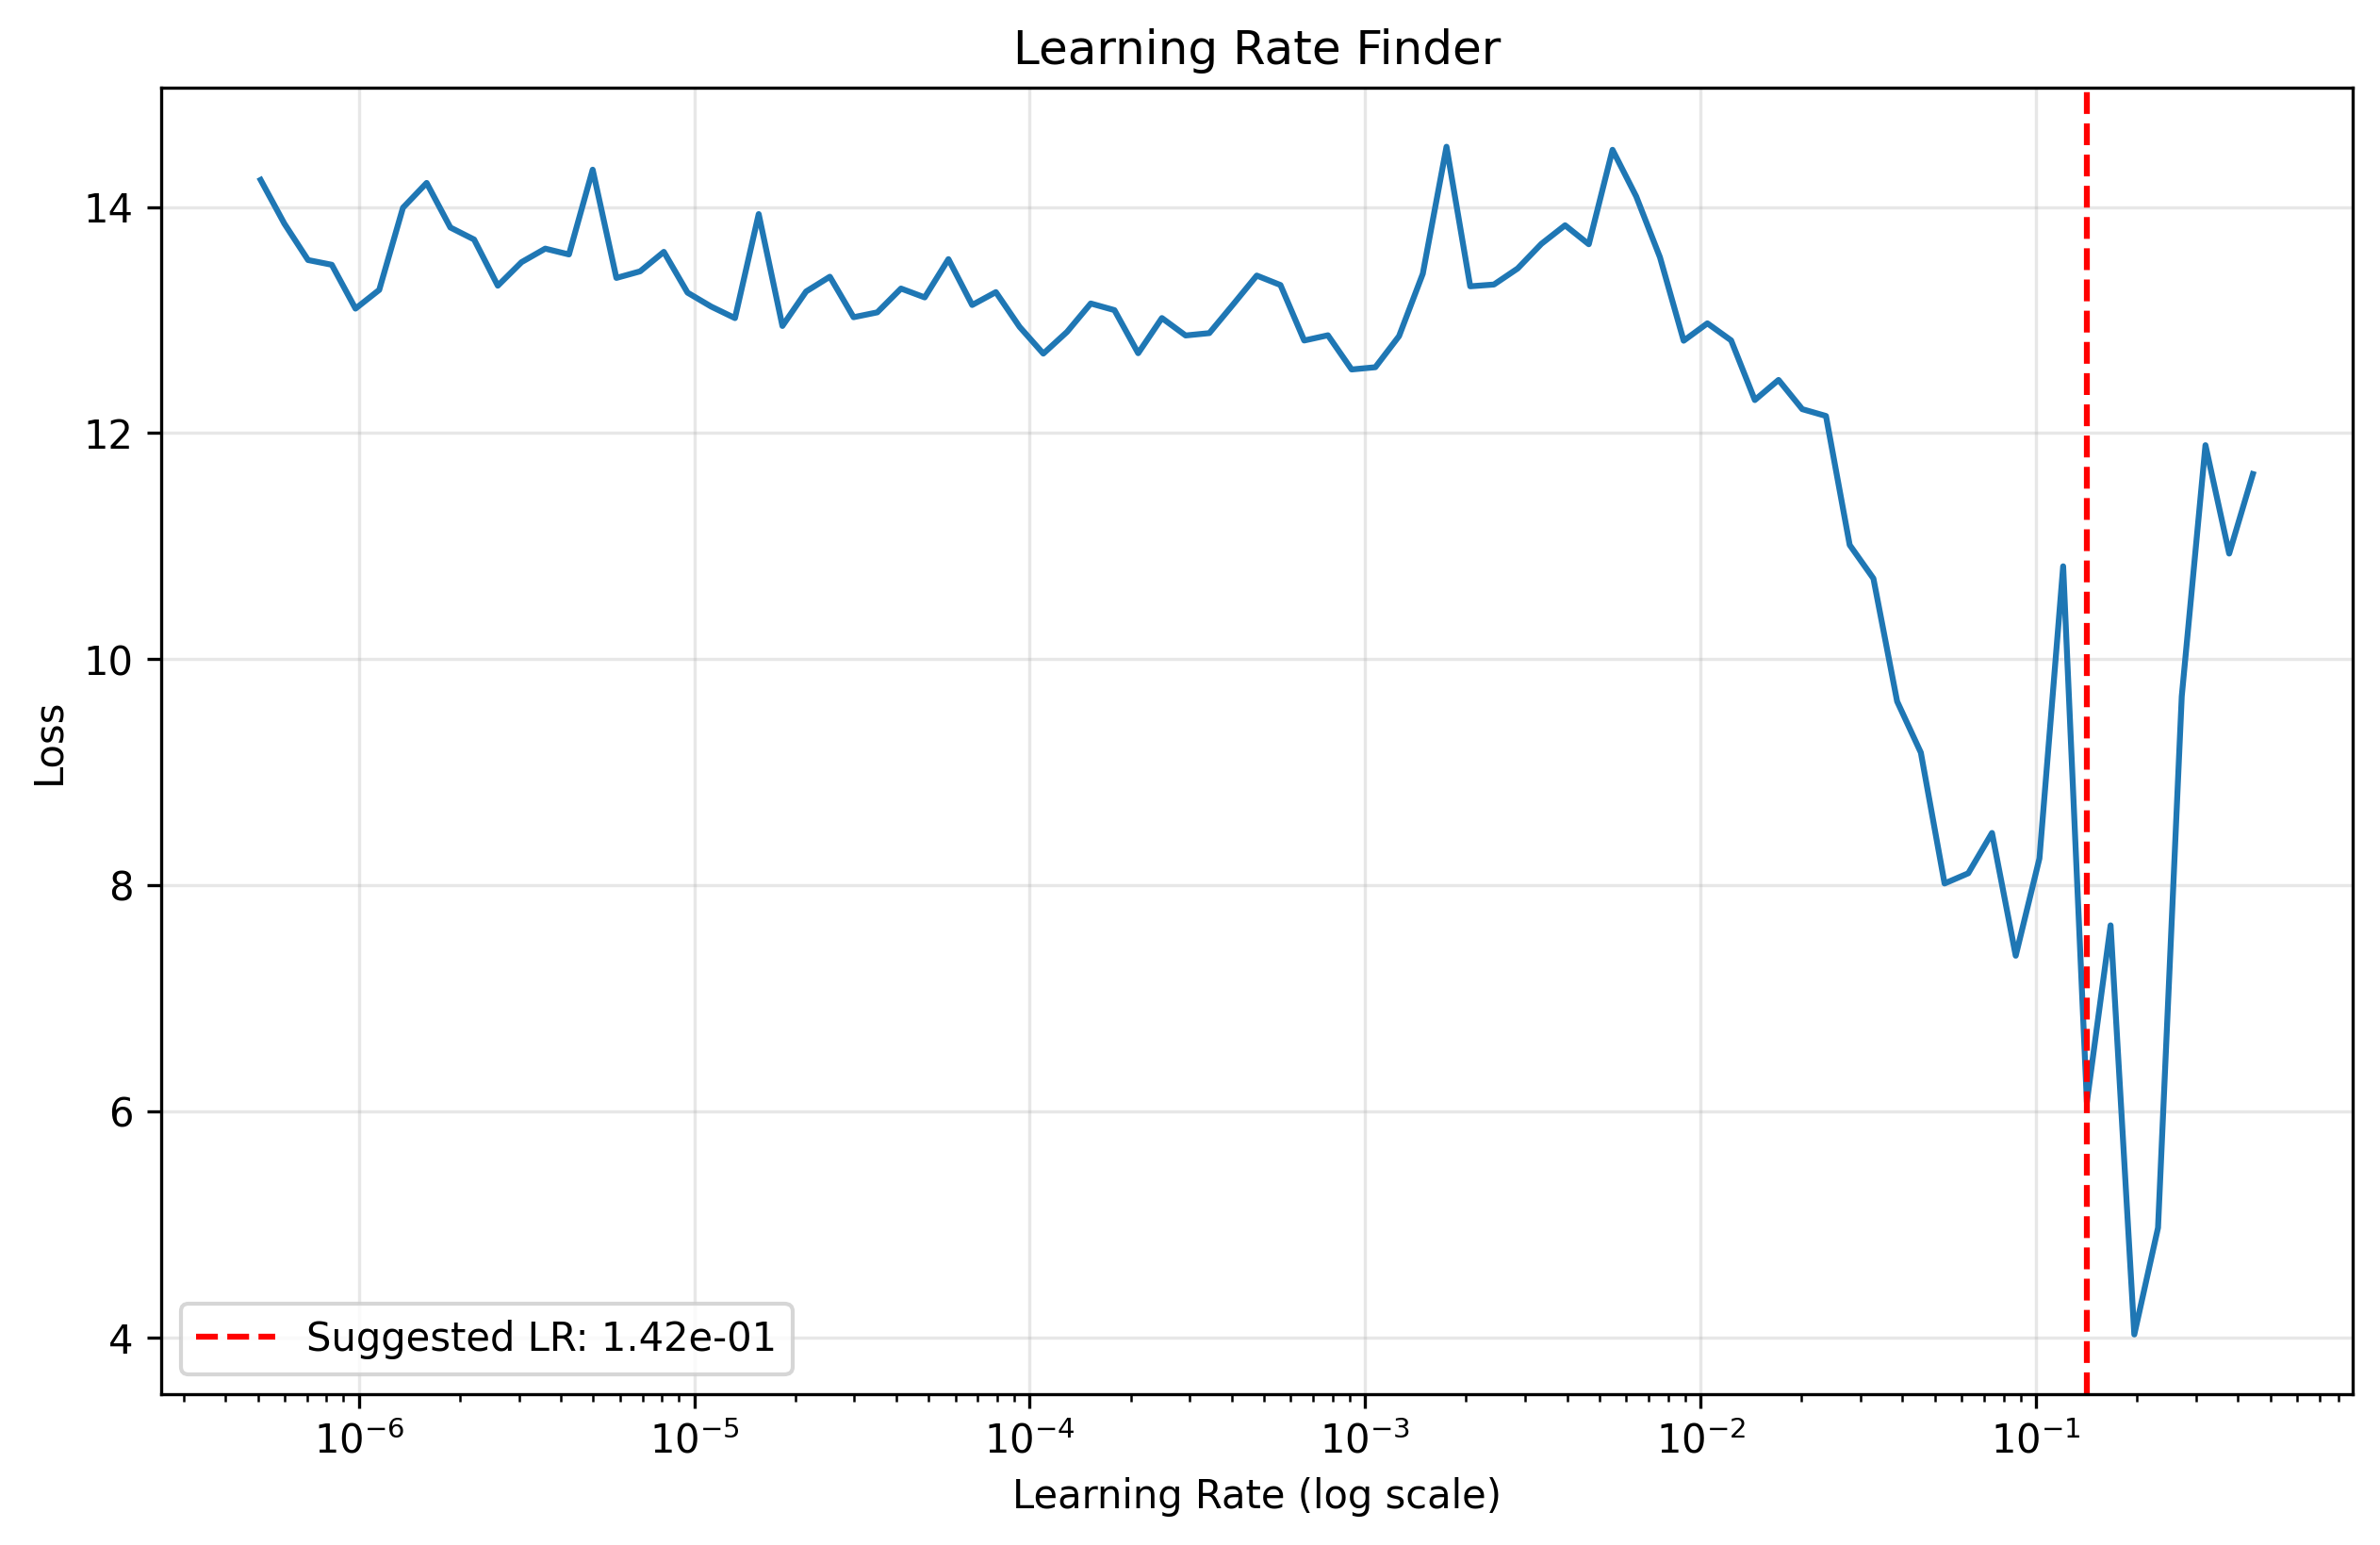

In [15]:
# Display the plot
if plot_file.exists():
    from IPython.display import Image, display
    print(f"Learning Rate Finder Plot:")
    display(Image(str(plot_file)))
else:
    print(f"Plot file not found: {plot_file}")

## Compare Multiple Model Types

In [ ]:
# Run LR finder for different model types
model_types = [ModelType.SHALLOW_NN, ModelType.TWO_LAYER_NN, ModelType.RESIDUAL_MLP]
results = {}

for model_type in model_types:
    print(f"\nRunning LR Finder for {model_type.value}...")
    try:
        suggested_lr = run_lr_finder(
            dataloader_dir=dataloader_dir,
            store_cluster=store_cluster,
            item_cluster=item_cluster,
            model_type=model_type,
            output_dir=output_dir,
            start_lr=start_lr,
            end_lr=end_lr,
            num_iter=50,  # Fewer iterations for comparison
            log_level="WARNING"  # Less verbose
        )
        results[model_type.value] = suggested_lr
        print(f"Suggested LR for {model_type.value}: {suggested_lr:.2e}")
    except Exception as e:
        print(f"Error with {model_type.value}: {e}")
        results[model_type.value] = None

print("\n" + "="*50)
print("LEARNING RATE COMPARISON")
print("="*50)
for model_name, lr in results.items():
    if lr is not None:
        print(f"{model_name:15}: {lr:.2e}")
    else:
        print(f"{model_name:15}: Failed")

## Usage Recommendations

Based on the Learning Rate Finder results:

1. **Use the suggested learning rate** as a starting point for training
2. **Consider using 1/10th of the suggested LR** for more conservative training
3. **The optimal LR is typically where the loss decreases most steeply** (steepest negative gradient)
4. **Avoid LRs where the loss starts to increase or becomes unstable**

### Next Steps:
1. Update your training script to use the suggested learning rate
2. Consider using learning rate scheduling (like ReduceLROnPlateau) starting from this optimal LR
3. Monitor training closely for the first few epochs to ensure stability